In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# This python code is about applying recurrent neural network on a sine wave.

In [9]:
x = np.linspace(0,50,501)

In [10]:
y = np.sin(x)
print(x,y)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

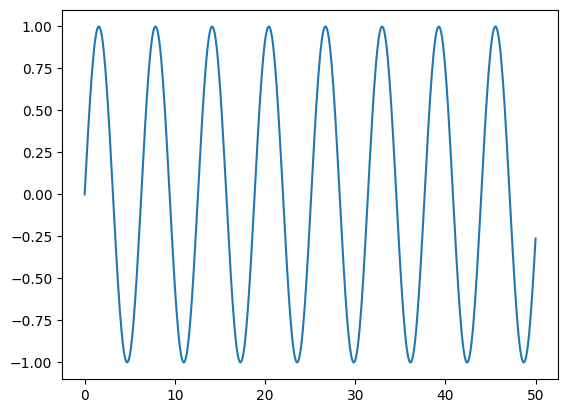

In [11]:
plt.plot(x,y)

In [12]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [13]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [14]:
len(df)

501

In [15]:
test_percent = 0.1

In [16]:
len(df)*test_percent

50.1

In [17]:
test_point=np.round(len(df)*test_percent)

In [18]:
test_ind = int(len(df)-test_point)

In [19]:
test_ind

451

In [20]:
train = df.iloc[:test_ind]

In [21]:
test=df.iloc[test_ind:]

In [22]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(train)

MinMaxScaler()

In [26]:
scaled_train = scaler.transform(train)

In [27]:
scaled_test = scaler.transform(test)

In [28]:
import tensorflow

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.legacy.preprocessing.sequence:

class TimeseriesGenerator(keras.src.trainers.data_adapters.py_dataset_adapter.PyDataset)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |
 |  Utility class for generating batches of temporal data.
 |
 |  DEPRECATED.
 |
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |
 |  Arguments:
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of 

In [31]:
#length = 4
length= 50  # Because the one complete cycle of sine wave has 50 points.

In [32]:
batch_size = 1

In [33]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [34]:
len(scaled_train)

451

In [35]:
len(generator)

401

In [36]:
X,y = generator[0]

In [37]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [38]:
y

array([[0.02053313]])

In [39]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [40]:
from tensorflow.keras.models import Sequential

In [41]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [42]:
n_features = 1

In [43]:
model = Sequential()
model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss= 'mse')

/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(generator,epochs=5)

Epoch 1/5
 48/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0180

/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0052
Epoch 2/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8120e-04
Epoch 3/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1838e-05
Epoch 4/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.6662e-06
Epoch 5/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8056e-06


<Axes: >

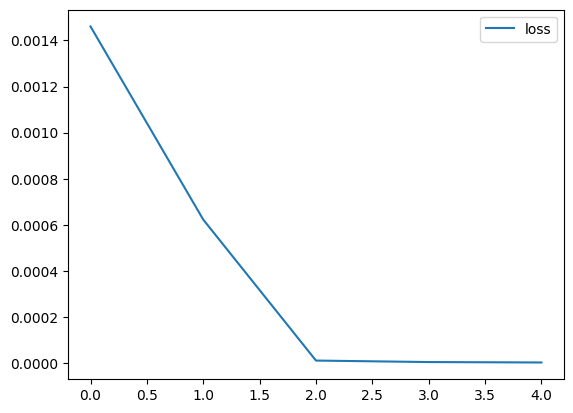

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
#first_eval_batch = scaled_train[-length:]

In [ ]:
# When reshaping data for models like RNN'S ,you need to provide input in the form of a 3D array 
# batch_size,sequence_length,n_features

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [ ]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


array([[0.9492526]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.94955134])

In [ ]:
test_predictions = []

In [ ]:
#first_eval_batch = scaled_train[-length:]

In [ ]:
#first_eval_batch = scaled_train[-length:]

In [ ]:
current_batch = first_eval_batch.reshape((1,length,n_features))

In [ ]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [ ]:
current_batch
print(current_batch.shape)  # Add this inside the loop for debugging

(1, 50, 1)


In [ ]:
for i in range(len(test)):
    current_pred= model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [ ]:
test_predictions
print(current_batch.shape)  # Add this inside the loop for debugging

(1, 50, 1)


In [ ]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[ 0.89849977],
       [ 4.08979648],
       [ 4.12348476],
       [ 4.11195874],
       [ 4.11312412],
       [ 4.11297154],
       [ 4.11298107],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4

In [ ]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [ ]:
true_predictions

array([[ 0.89849977],
       [ 4.08979648],
       [ 4.12348476],
       [ 4.11195874],
       [ 4.11312412],
       [ 4.11297154],
       [ 4.11298107],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4.11298012],
       [ 4

In [ ]:
len(true_predictions)

200

In [ ]:
len(test)

50